In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix



In [2]:
data = pd.read_csv ('/Users/nina/Downloads/mlproject/data/Clean_Dataset.csv')
print(data.shape)
data.head()

(300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# drop index column and check the datatype
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [4]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
# check null values
data.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [6]:
# check number of unique values
print(f"airline, {data['airline'].nunique()} ")
print(f"flight, {data['flight'].nunique()} ")
print(f"source_city, {data['source_city'].nunique()} ")
print(f"departure_time, {data['departure_time'].nunique()} ")
print(f"stops, {data['stops'].nunique()} ")
print(f"arrival_time, {data['arrival_time'].nunique()} ")
print(f"destination_city, {data['destination_city'].nunique()} ")
print(f"class, {data['class'].nunique()} ")
print(f"days_left, {data['days_left'].nunique()} ")

airline, 6 
flight, 1561 
source_city, 6 
departure_time, 6 
stops, 3 
arrival_time, 6 
destination_city, 6 
class, 2 
days_left, 49 


In [7]:
# replace "one" to "1", "zero" to "0", "two_or_more" to "2"
# data.replace({'stops': {'one': 1, 'zero': 0, 'two_or_more': 2}}, inplace=True)

In [8]:
# convert column "class" to boolean value, with "Economy" = True, "Business" = Flase
data['class_label'] = np.where(data['class'] == "Economy", True, False)

In [9]:
print(f"airline values, {data['airline'].value_counts()} ")
print(f"source_city values, {data['source_city'].value_counts()} ")
print(f"departure_time values, {data['departure_time'].value_counts()} ")
print(f"stops values, {data['stops'].value_counts()} ")
print(f"arrival_time values, {data['arrival_time'].value_counts()} ")
print(f"destination_city values, {data['destination_city'].value_counts()} ")

airline values, Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64 
source_city values, Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64 
departure_time values, Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64 
stops values, one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64 
arrival_time values, Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64 
destination_city values, Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: i

In [10]:
# label encode three categorical columns
le = LabelEncoder()
data["airline_label"] = le.fit_transform(data['airline'])
data["source_city_label"] = le.fit_transform(data['source_city'])
data["destination_city_label"] = le.fit_transform(data['destination_city'])

In [11]:
# category time and stops according to sequence

def time_label(value):
    if value == "Early_Morning":
        return 0
    elif value == "Morning":
        return 1
    elif value == "Afternoon":
        return 2
    elif value == "Evening":
        return 3
    elif value == "Night":
        return 4
    elif value == "Late_Night":
        return 5

def stops_label(value):
    if value == "zero":
        return 0
    elif value == "one":
        return 1
    elif value == "two_or_more":
        return 2
    

data['departure_time_label'] = data['departure_time'].map(time_label)
data['arrival_time_label'] = data['arrival_time'].map(time_label)
data['stops_label'] = data['stops'].map(stops_label)


In [12]:
print(data.shape)
display(data.head())

(300153, 18)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,class_label,airline_label,source_city_label,destination_city_label,departure_time_label,arrival_time_label,stops_label
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,True,4,2,5,3,4,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,True,4,2,5,0,1,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,True,0,2,5,0,0,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,True,5,2,5,1,2,0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,True,5,2,5,1,1,0


In [13]:
print(f"airline values, {data['airline_label'].value_counts()} ")
print(f"airline values, {data['source_city_label'].value_counts()} ")
print(f"airline values, {data['destination_city_label'].value_counts()} ")

airline values, 5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline_label, dtype: int64 
airline values, 2    61343
5    60896
0    52061
4    46347
3    40806
1    38700
Name: source_city_label, dtype: int64 
airline values, 5    59097
2    57360
0    51068
4    49534
3    42726
1    40368
Name: destination_city_label, dtype: int64 


In [14]:
print(data.head(3))
dataclean=data
dataclean=dataclean.drop(['airline', 'flight', 'source_city','departure_time','stops','arrival_time', 'destination_city','class'],axis=1)
print(dataclean.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   

  destination_city    class  duration  days_left  price  class_label  \
0           Mumbai  Economy      2.17          1   5953         True   
1           Mumbai  Economy      2.33          1   5953         True   
2           Mumbai  Economy      2.17          1   5956         True   

   airline_label  source_city_label  destination_city_label  \
0              4                  2                       5   
1              4                  2                       5   
2              0                  2                       5   

   departure_time_label  arrival_time_label  stops_label  
0                     3                   4            0  
1                     0                   1        

# EDA

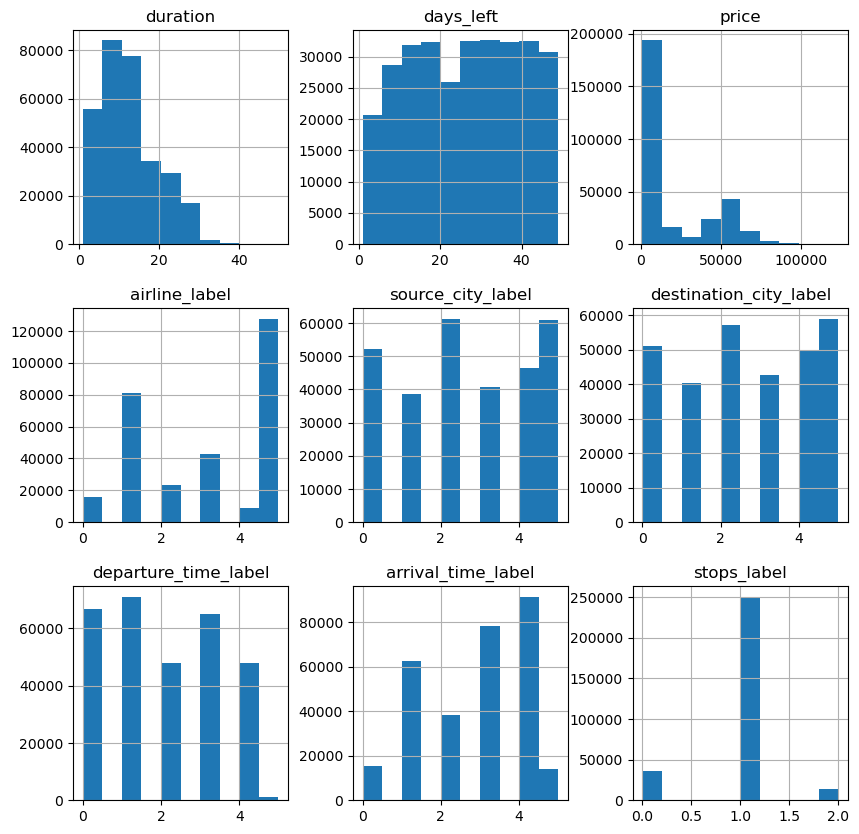

In [15]:
#histograms
data.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

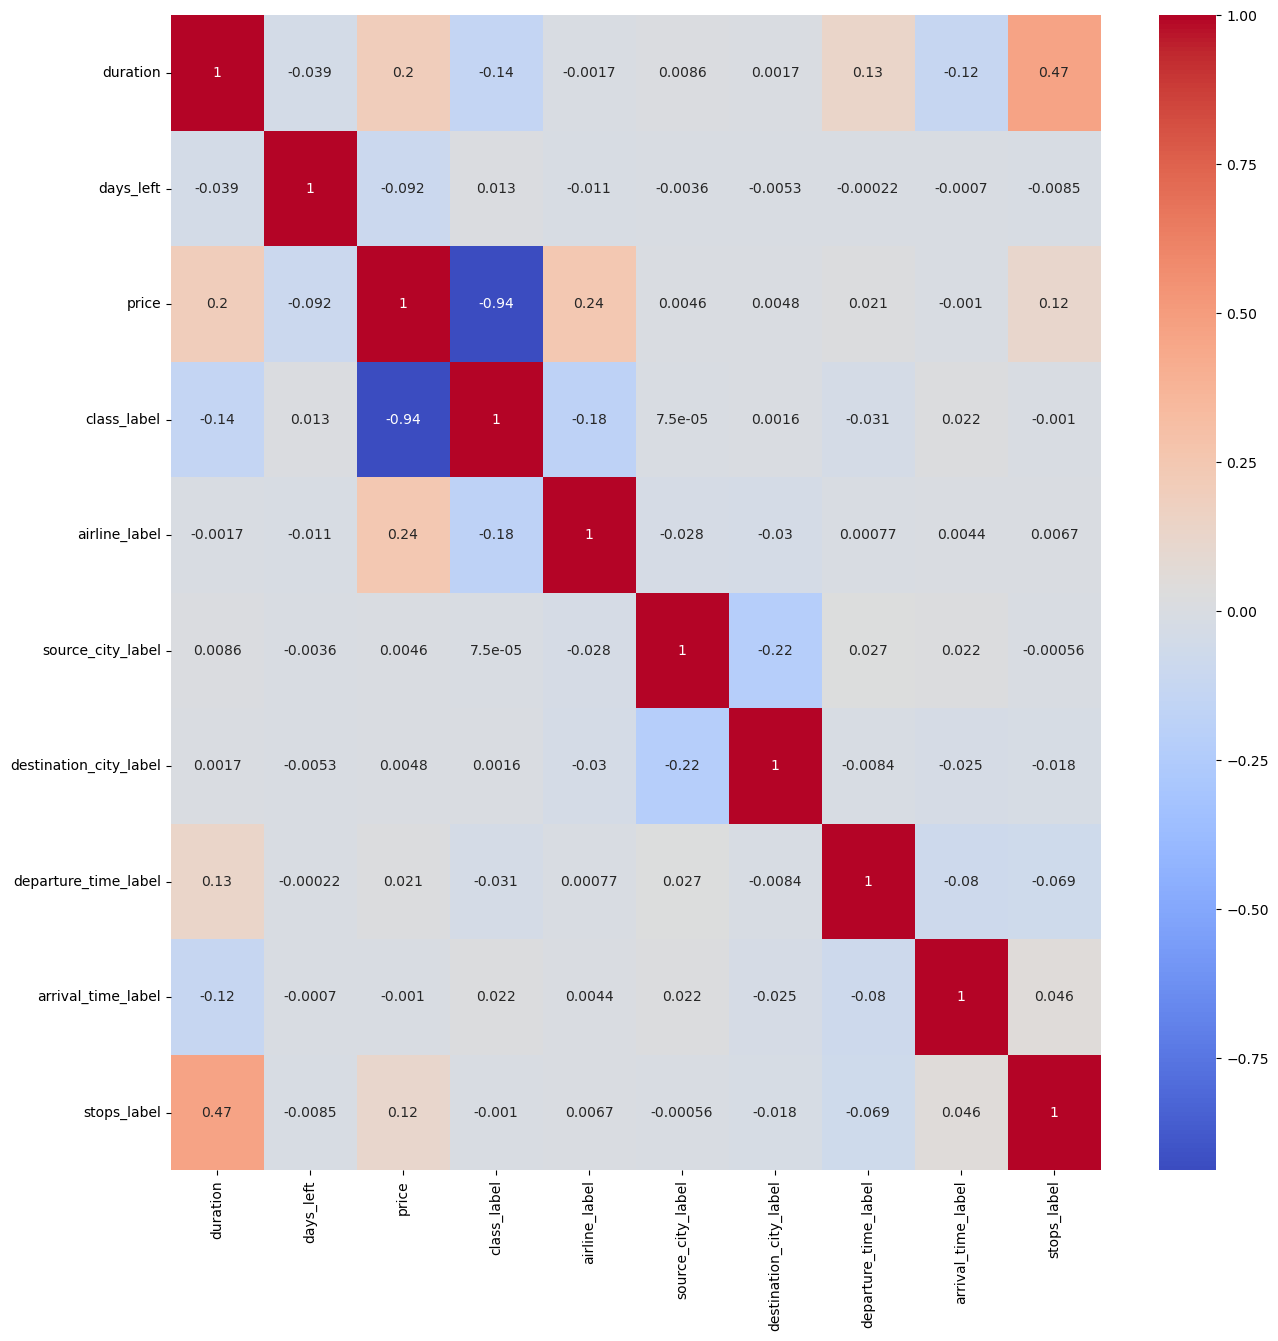

In [16]:
dataclean.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(dataclean.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:xlabel='days_left', ylabel='price'>

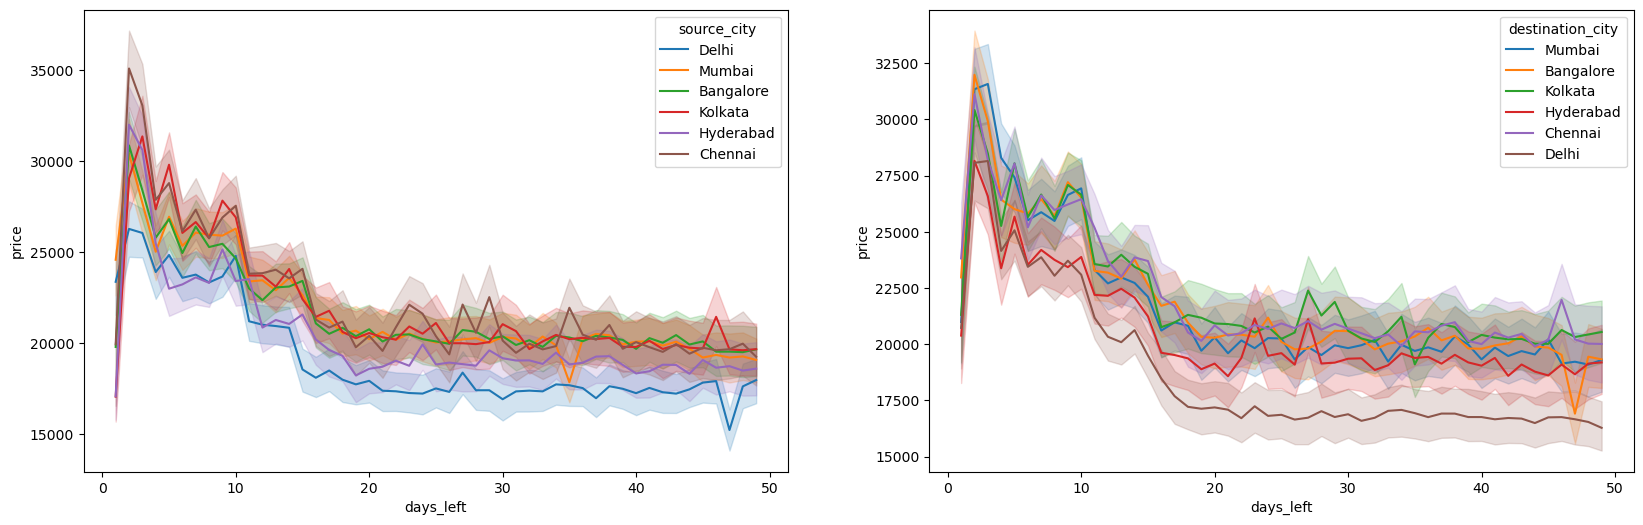

In [17]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=data,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=data,hue='destination_city',ax=ax[1])

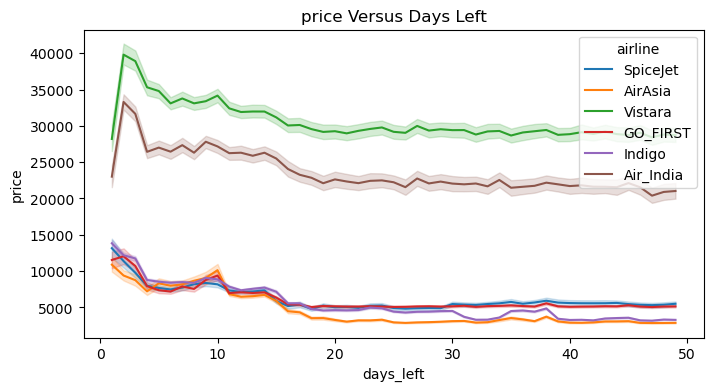

In [18]:
plt.figure(figsize=(8,4))
sns.lineplot(x='days_left',y='price',data=data,hue='airline')
plt.title('price Versus Days Left')
plt.show()

<AxesSubplot:xlabel='destination_city', ylabel='price'>

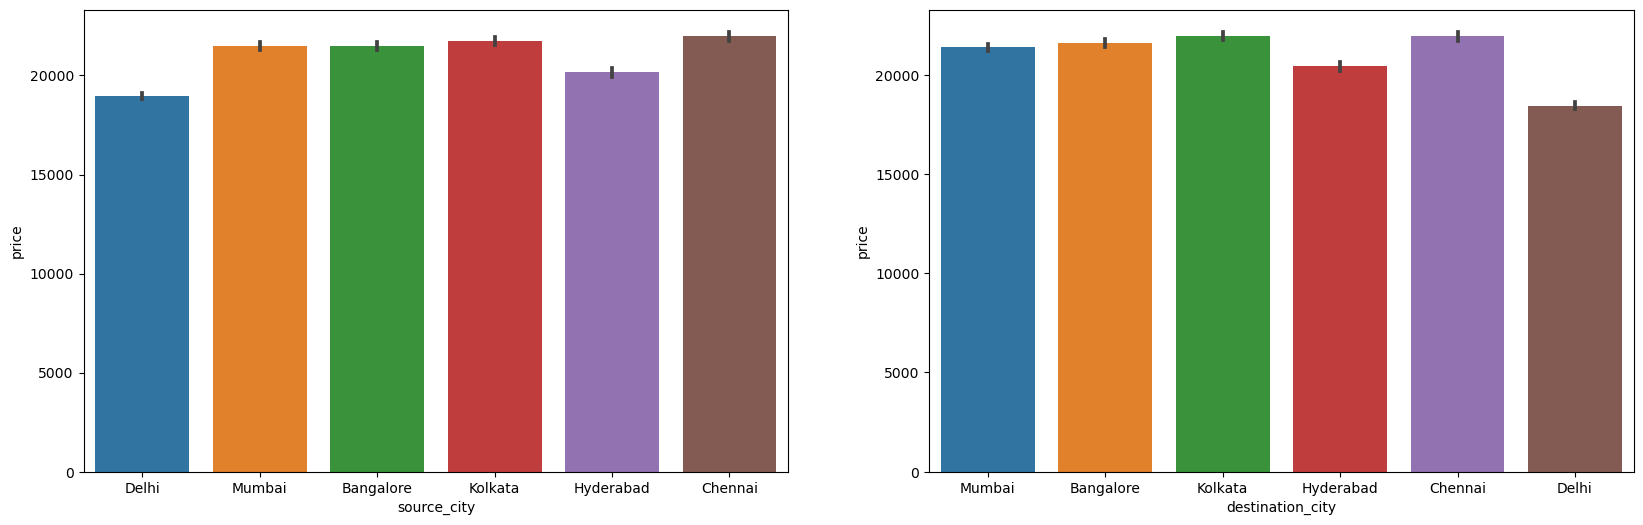

In [19]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x='source_city',y='price',data=data,ax=ax[0])
sns.barplot(x='destination_city',y='price',data=data,ax=ax[1])

<AxesSubplot:xlabel='arrival_time', ylabel='price'>

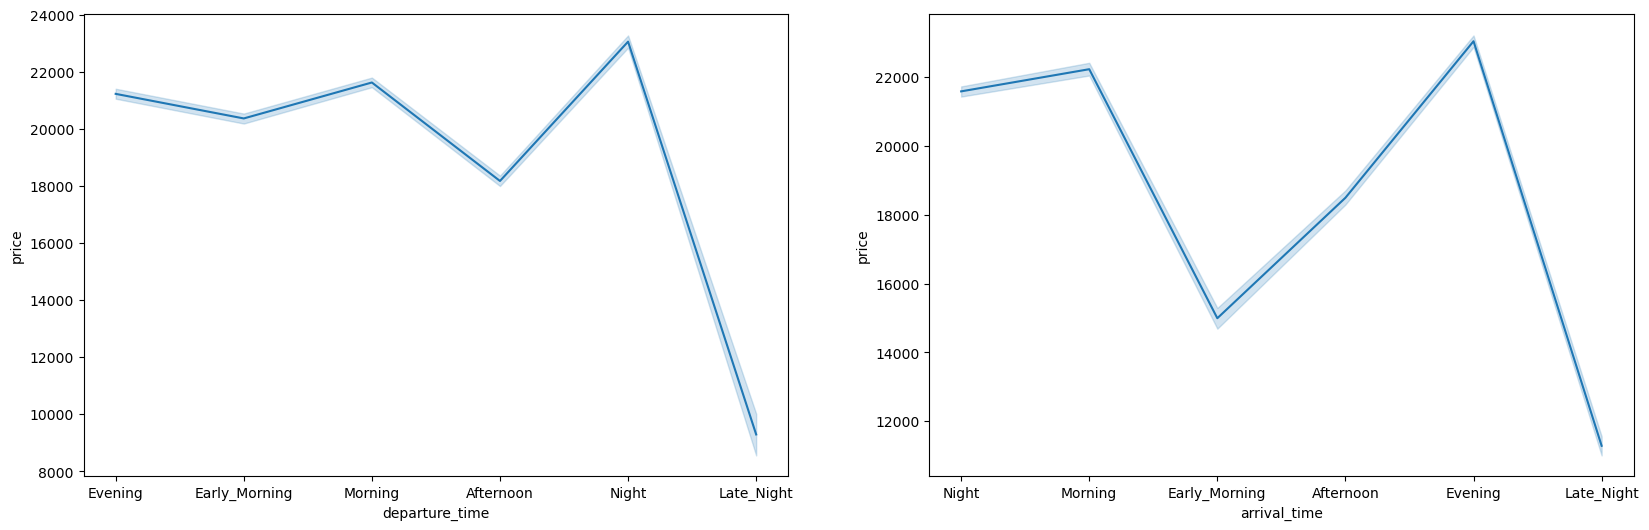

In [20]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='departure_time',y='price',data=data,ax=ax[0])
sns.lineplot(x='arrival_time',y='price',data=data,ax=ax[1])

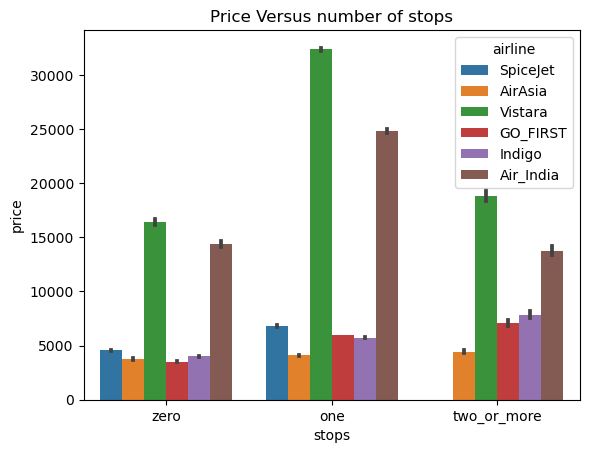

In [21]:
sns.barplot(x='stops',y='price',data=data, hue='airline')
plt.title('Price Versus number of stops')
plt.show()

<AxesSubplot:xlabel='class', ylabel='price'>

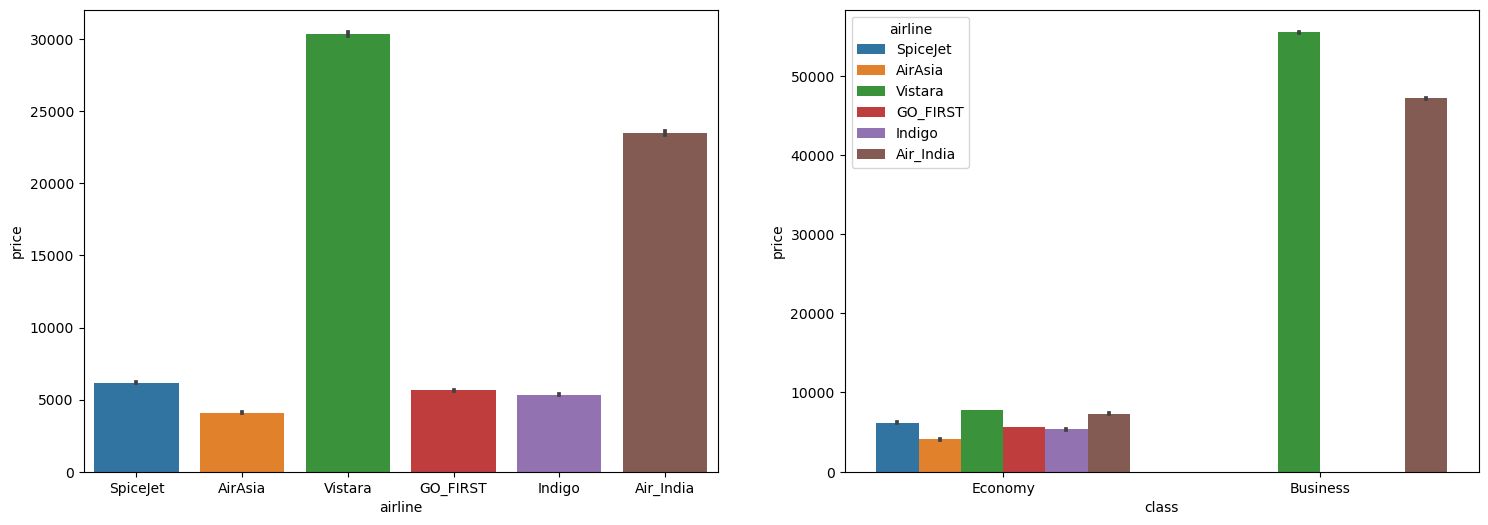

In [22]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot(x='airline',y='price',data=data,ax=ax[0])
sns.barplot(x='class',y='price',data=data, hue='airline',ax=ax[1])

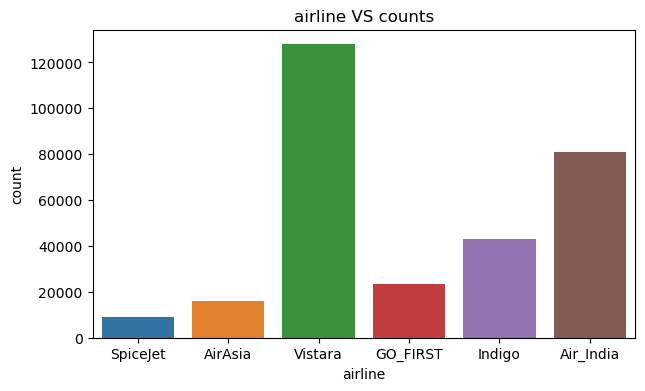

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(x = data.airline)
plt.title('airline VS counts') #没太理解为什么
plt.show()

# train test split

In [24]:
X=dataclean.drop(['price'],axis=1)
y=dataclean[['price']]

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 42)



Algorithms


In [25]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_percentage_error



cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)







In [26]:


lr = LinearRegression()
lr_model = lr.fit(Train_X,Train_Y)
y_pred = lr_model.predict(Train_X)
print('Negative MAPE: - ', mean_absolute_percentage_error(Train_Y,y_pred))

Negative MAPE: -  0.4219471287301026


In [27]:
Ridge_model = Ridge()
Ridge_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define Ridge_grid
Ridge_grid = dict()
##tune alpha
Ridge_grid['alpha'] = np.arange(0.01, 1, 0.01)
Ridge_grid['max_iter'] = np.array([500,1000,2000])
Ridge_search = GridSearchCV(Ridge_model, Ridge_grid, scoring='neg_mean_absolute_error', cv=Ridge_cv, n_jobs=-1)
results = Ridge_search.fit(Train_X,Train_Y)
print('Negative MAE:' ,results.best_score_)
print('Best params are :' , results.best_params_)

Negative MAE: -4544.602685692874
Best params are : {'alpha': 0.01, 'max_iter': 500}


In [28]:
Lasso_model = Lasso()
Lasso_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define Lasso_grid
Lasso_grid = dict()
##tune alpha
Lasso_grid['alpha'] = np.arange(0.10, 1, 0.01)
Lasso_grid['max_iter'] = np.array([500,1000,2000])
Lasso_search = GridSearchCV(Lasso_model, Lasso_grid, scoring='neg_mean_absolute_error', cv=Lasso_cv, n_jobs=-1)
results = Lasso_search.fit(Train_X,Train_Y)
print('Negative MAE:' ,results.best_score_)
print('Best params are :' , results.best_params_)

Negative MAE: -4544.101968343933
Best params are : {'alpha': 0.9899999999999995, 'max_iter': 500}


In [29]:
ElasticNet_model = ElasticNet()
ElasticNet_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define ElasticNet_grid
ElasticNet_grid = dict()
##tune alpha
ElasticNet_grid['alpha'] = np.arange(0.01, 1, 0.01)
ElasticNet_grid['max_iter'] = np.array([500,1000,2000])
ElasticNet_search = GridSearchCV(ElasticNet_model, ElasticNet_grid, scoring='neg_mean_absolute_error', cv=ElasticNet_cv, n_jobs=-1)
results = ElasticNet_search.fit(Train_X,Train_Y)
print('Negative MAE:' ,results.best_score_)
print('Best params are :' , results.best_params_)

Negative MAE: -4586.1658125150025
Best params are : {'alpha': 0.01, 'max_iter': 500}
